In [1]:
pip install pandas tqdm matplotlib seaborn pyarrow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from util import *
import seaborn as sns

In [3]:
# Change to directory of dataset file
# Dataset file is guaranteed to have all days for all stocks, i.e. shift(30) is guaranteed to be 30 calendar days
# This leaves a lot of NaNs to be filled
path = "roberta.parquet"

In [4]:
# Horizons to calculate future returns (e.g. price after N days)
target_horizons = [10, 30, 90]
# Horizons to calculate lookbacks for rolling means (e.g. mean sentiment over last N days)
lookback_periods = [10, 30, 90]
# Enable to add residualised returns as a target 
# Also known as idiosyncratic returns, ie individual stock returns after removing overall market trends 
# Takes about 60 seconds per target horizon, so disable if not needed
residualise_returns = False

# Date range, leave None to use all available data (where we have prices)
start_date = "2014-01-01"
end_date = "2022-01-01" # Keep out of sample for now
df = load_dataset(
    path,
    target_horizons = target_horizons,
    lookback_periods = lookback_periods,
    residualise_returns = residualise_returns,
    start_date=start_date,
    end_date=end_date
)

100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


# Volatility Correlation

Have done:

Feature volatility <-> Target Volatility

Normal Features <-> Target Volatility

Feature Volatility <-> Normal Targets


## 1. Correlation of Feature Volatility and Target Volatility

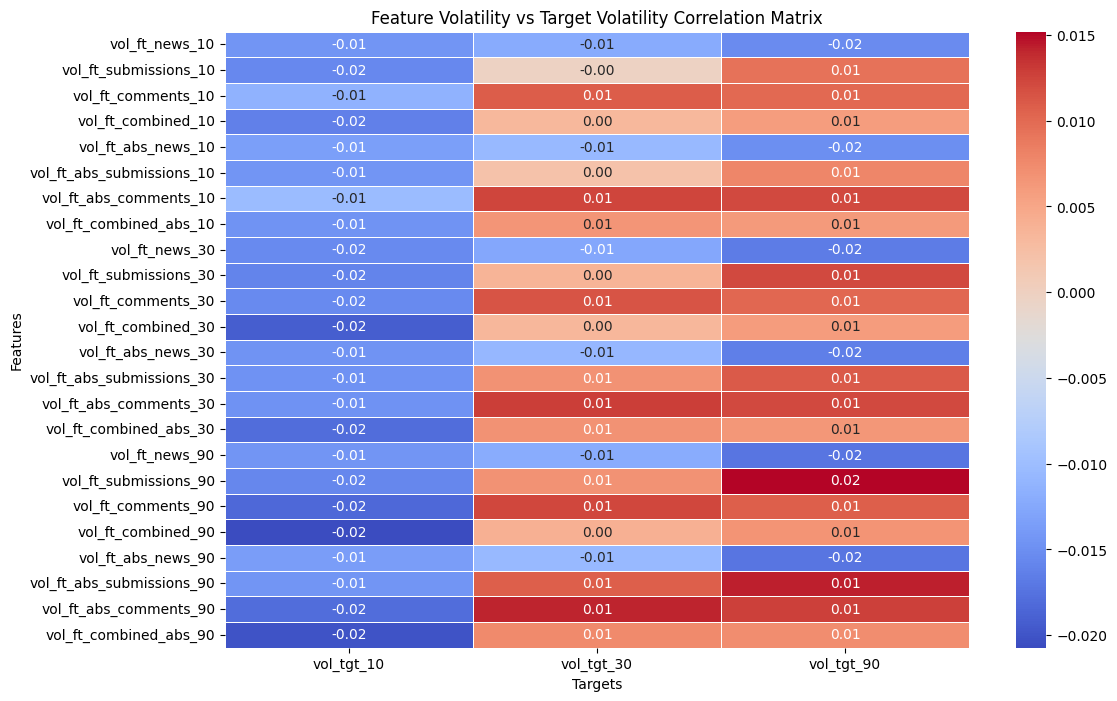

In [5]:

def vol_feature_vol_target(df, exclude=[]):
    # Select target and feature columns
    target_cols = [col for col in df.columns if col.startswith('vol_tgt')]
    feature_cols = [col for col in df.columns if col.startswith('vol_ft_') and col not in exclude]
    
    # Compute correlation matrix
    corr_matrix = df[feature_cols + target_cols].corr()
    
    # Extract only feature vs. target correlations
    corr_submatrix = corr_matrix.loc[feature_cols, target_cols]
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_submatrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Feature Volatility vs Target Volatility Correlation Matrix")
    plt.xlabel("Targets")
    plt.ylabel("Features")
    plt.show()

vol_feature_vol_target(df)

## 2. Correlation of Feature Volatility and Target Returns

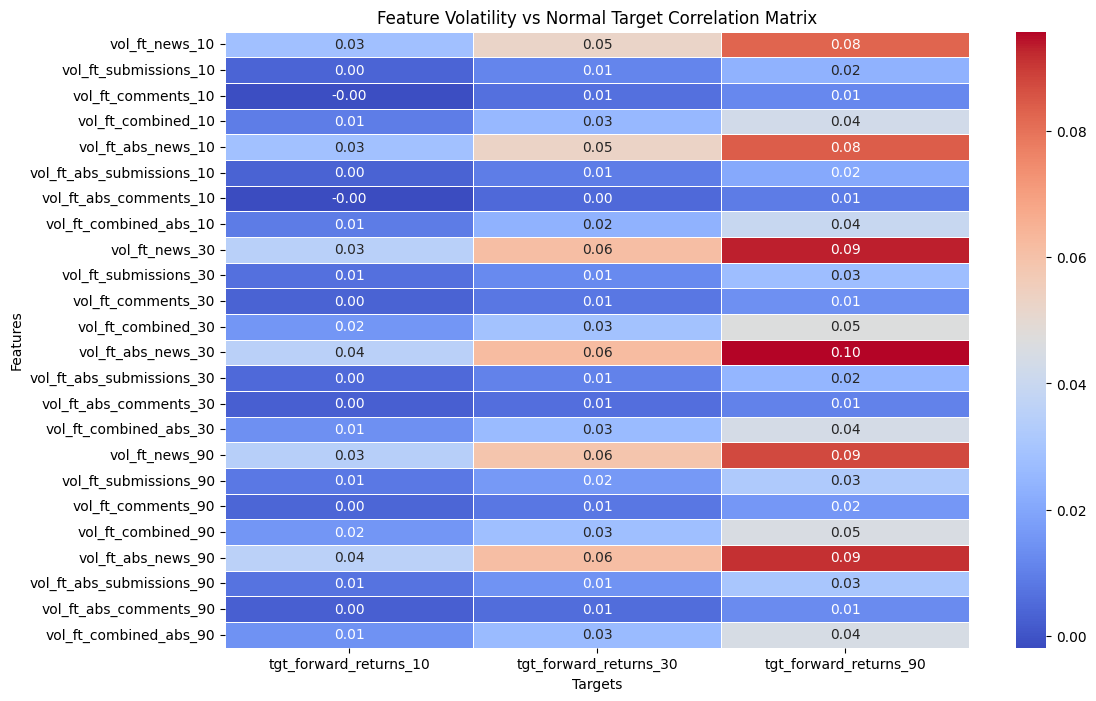

In [6]:

def vol_feature_target(df, exclude=[]):
    # Select target and feature columns
    target_cols = [col for col in df.columns if col.startswith('tgt_')]
    feature_cols = [col for col in df.columns if col.startswith('vol_ft_') and col not in exclude]
    
    # Compute correlation matrix
    corr_matrix = df[feature_cols + target_cols].corr()
    
    # Extract only feature vs. target correlations
    corr_submatrix = corr_matrix.loc[feature_cols, target_cols]
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_submatrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Feature Volatility vs Normal Target Correlation Matrix")
    plt.xlabel("Targets")
    plt.ylabel("Features")
    plt.show()

vol_feature_target(df)

## 3. Correlation of Feature Sentiment Scores and Target Volatility

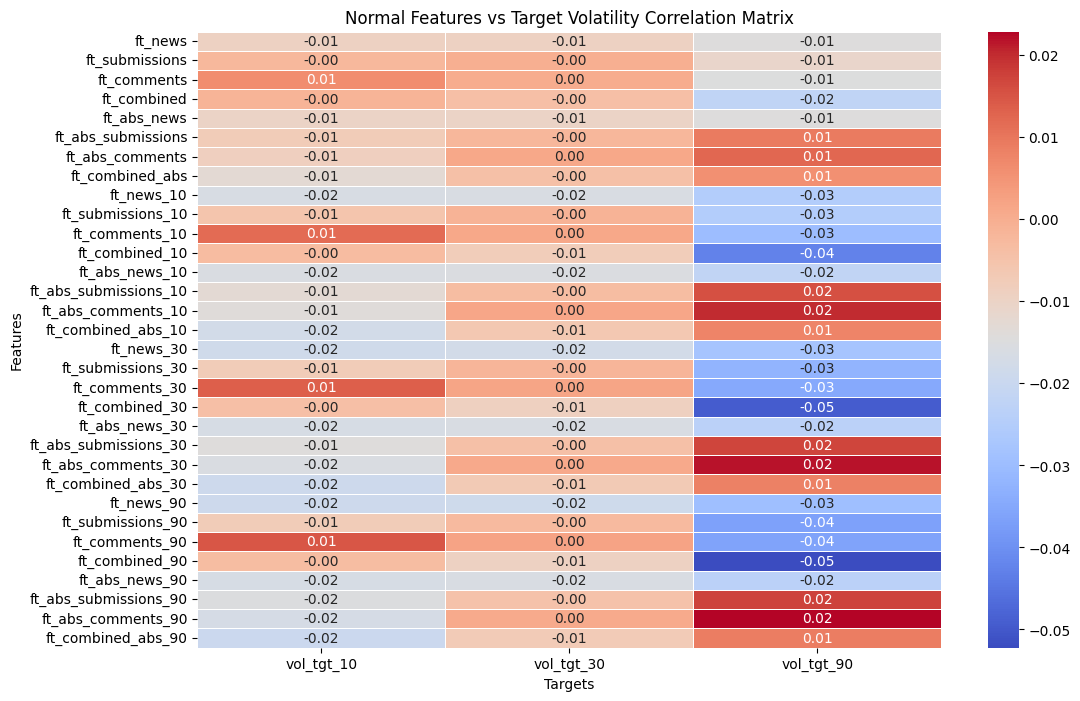

In [7]:

def feature_vol_target(df, exclude=[]):
    # Select target and feature columns
    target_cols = [col for col in df.columns if col.startswith('vol_tgt')]
    feature_cols = [col for col in df.columns if col.startswith('ft_') and col not in exclude]
    
    # Compute correlation matrix
    corr_matrix = df[feature_cols + target_cols].corr()
    
    # Extract only feature vs. target correlations
    corr_submatrix = corr_matrix.loc[feature_cols, target_cols]
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_submatrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title("Normal Features vs Target Volatility Correlation Matrix")
    plt.xlabel("Targets")
    plt.ylabel("Features")
    plt.show()

feature_vol_target(df)